In [272]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import numpy as np
from sklearn.metrics import mean_squared_error

In [273]:
data = pd.read_csv('processed.cleveland.data.txt', sep=",", header=None)

In [274]:
data.shape

(303, 14)

In [275]:
#handle missing value, remove from the dataset
dropRows = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data.iloc[i, j] is '?':
            dropRows.append(i)


In [276]:
dropRows

[87, 166, 192, 266, 287, 302]

In [277]:
data = data.drop(dropRows)

In [278]:
data = data.reset_index(drop = True)

In [279]:
for i in range(14):
    data.iloc[:, i] = pd.to_numeric(data.iloc[:, i], errors='coerce')


In [280]:
# visualize data 
for i in range(0, 14):
    print('standard deviation for column ', str(i), ': ', data.iloc[:, i].std(), 'variance for column ', str(i), ': ', data.iloc[:, i].var())
    

standard deviation for column  0 :  9.049735681096765 variance for column  0 :  81.89771589771594
standard deviation for column  1 :  0.46849996744100164 variance for column  1 :  0.2194922194922196
standard deviation for column  2 :  0.9648594099420302 variance for column  2 :  0.9309536809536827
standard deviation for column  3 :  17.762806366598998 variance for column  3 :  315.51729001728984
standard deviation for column  4 :  51.99758253513897 variance for column  4 :  2703.748589498589
standard deviation for column  5 :  0.35247393412545347 variance for column  5 :  0.12423787423787452
standard deviation for column  6 :  0.9949138102637306 variance for column  6 :  0.9898534898534945
standard deviation for column  7 :  22.941562061360813 variance for column  7 :  526.3152698152697
standard deviation for column  8 :  0.4697608121961864 variance for column  8 :  0.22067522067522066
standard deviation for column  9 :  1.1661227818468953 variance for column  9 :  1.359842342342342
st

In [281]:
data_label = data.iloc[:, -1]

In [282]:
data = data.iloc[:, 0 : -1]

In [191]:
train, test, train_label, test_label = train_test_split(data, data_label, test_size=0.3, random_state=27)

In [96]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [398]:
clf = tree.DecisionTreeClassifier()
clf.fit(train, train_label)
print(clf.fit(train, train_label).score(test, test_label))

0.488888888889


In [399]:
result = clf.predict(test)

In [400]:
rmse = mean_squared_error(test_label, result)
rmse

1.4222222222222223

In [100]:
scores = cross_val_score(clf, data, data_label, cv=5)

In [101]:
scores

array([ 0.48333333,  0.51666667,  0.48333333,  0.47457627,  0.51724138])

In [102]:
acc = scores.mean()
print('Average accuracy is ', acc)

Average accuracy is  0.495030196766


In [103]:
def cross_val_score_acc(model, data, label, cv):
    scores = cross_val_score(model, data, label, cv = cv)
    avg_acc = scores.mean()
    return avg_acc

In [390]:
from sklearn import svm
svmClf = svm.SVC()
svmClf.fit(train, train_label)
svmResult = svmClf.predict(test)
rmse = mean_squared_error(test_label, svmResult)
print(rmse)
print(svmClf.fit(train, train_label).score(test, test_label))

2.44444444444
0.533333333333


In [295]:
print(cross_val_score_acc(svmClf, train, train_label, 5))

0.541408147534


In [394]:
from sklearn.naive_bayes import GaussianNB
gnbClf = GaussianNB()
gnbClf.fit(train, train_label)
gnbResult = gnbClf.predict(test)
rmse = mean_squared_error(gnbResult, test_label)
print(gnbClf.fit(train, train_label).score(test, test_label))
rmse

0.533333333333


1.8666666666666667

In [107]:
print(cross_val_score_acc(gnbClf, data, data_label, 5))

0.559162283265


In [381]:
from sklearn.ensemble import RandomForestClassifier
rfClf = RandomForestClassifier(max_depth=3, random_state=0)
rfClf = rfClf.fit(train, train_label)
rfResult = rfClf.predict(test)
rmse = mean_squared_error(test_label, rfResult)
print(rmse)
print("before:", rfClf.fit(train, train_label).score(test, test_label))

1.77777777778
before: 0.555555555556


In [109]:
print(cross_val_score_acc(rfClf, data, data_label, 5))

0.558759010325


In [110]:
# visualize data 
for i in range(0, 13):
    print('standard deviation for column ', str(i), ': ', data.iloc[:, i].std(), 'variance for column ', str(i), ': ', data.iloc[:, i].var())
    print('min for column ', str(i), ': ', data.iloc[:, i].min(), 'max for column ', str(i), ': ', data.iloc[:, i].max())
    print('mean for column ', str(i), ': ', data.iloc[:, i].mean())
    

standard deviation for column  0 :  9.049735681096765 variance for column  0 :  81.89771589771594
min for column  0 :  29.0 max for column  0 :  77.0
mean for column  0 :  54.54208754208754
standard deviation for column  1 :  0.46849996744100164 variance for column  1 :  0.2194922194922196
min for column  1 :  0.0 max for column  1 :  1.0
mean for column  1 :  0.6767676767676768
standard deviation for column  2 :  0.9648594099420302 variance for column  2 :  0.9309536809536827
min for column  2 :  1.0 max for column  2 :  4.0
mean for column  2 :  3.1582491582491583
standard deviation for column  3 :  17.762806366598998 variance for column  3 :  315.51729001728984
min for column  3 :  94.0 max for column  3 :  200.0
mean for column  3 :  131.69360269360268
standard deviation for column  4 :  51.99758253513897 variance for column  4 :  2703.748589498589
min for column  4 :  126.0 max for column  4 :  564.0
mean for column  4 :  247.35016835016836
standard deviation for column  5 :  0.35

In [111]:
for i in range(0, 1):
    print('standard deviation for column ', str(i), ': ', data_label.std(), 'variance for column ', str(i), ': ', data_label.var())
    print('min for column ', str(i), ': ', data_label.min(), 'max for column ', str(i), ': ', data_label.max())
    print('mean for column ', str(i), ': ', data_label.mean())

standard deviation for column  0 :  1.23455053526173 variance for column  0 :  1.5241150241150243
min for column  0 :  0 max for column  0 :  4
mean for column  0 :  0.9461279461279462


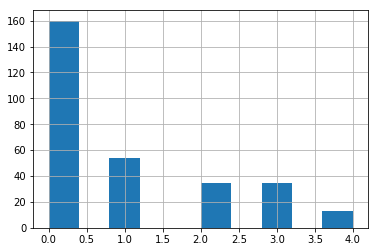

In [112]:
data_label.hist()
plot.show()

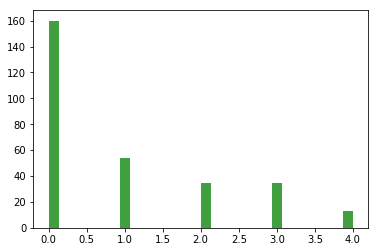

In [113]:
plot.hist(data_label, 30, facecolor='g', alpha=0.75)
plot.show()

In [114]:
np.correlate(data.iloc[:, 0], data.iloc[:, 1], )

array([ 10847.])

In [115]:
from sklearn.neural_network import MLPClassifier

In [338]:
mlpClf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 4), random_state=1)

In [371]:
mlpClf.fit(train, train_label)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [372]:
mlpResult = mlpClf.predict(test)

print(mlpClf.score(test, test_label))
rmse = mean_squared_error(test_label, gnbResult)
rmse

0.533333333333


1.8666666666666667

In [119]:
print(cross_val_score_acc(mlpClf, data, data_label, 5))

0.549049288915


In [120]:
from sklearn.ensemble import AdaBoostClassifier
adaClf = AdaBoostClassifier()
adaClf.fit(train, train_label)
adaResult = adaClf.predict(test)
rmse = mean_squared_error(test_label, adaResult)
rmse

1.1333333333333333

In [121]:
print(cross_val_score_acc(adaClf, data, data_label, 5))

0.532437171245


In [140]:
from sklearn.decomposition import PCA
nData.iloc[:, 0].reshape(1, -1)

/Users/nick/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


array([[ 63.,  67.,  67.,  37.,  41.,  56.,  62.,  57.,  63.,  53.,  57.,
         56.,  56.,  44.,  52.,  57.,  48.,  54.,  48.,  49.,  64.,  58.,
         58.,  58.,  60.,  50.,  58.,  66.,  43.,  40.,  69.,  60.,  64.,
         59.,  44.,  42.,  43.,  57.,  55.,  61.,  65.,  40.,  71.,  59.,
         61.,  58.,  51.,  50.,  65.,  53.,  41.,  65.,  44.,  44.,  60.,
         54.,  50.,  41.,  54.,  51.,  51.,  46.,  58.,  54.,  54.,  60.,
         60.,  54.,  59.,  46.,  65.,  67.,  62.,  65.,  44.,  65.,  60.,
         51.,  48.,  58.,  45.,  53.,  39.,  68.,  52.,  44.,  47.,  53.,
         51.,  66.,  62.,  62.,  44.,  63.,  52.,  59.,  60.,  52.,  48.,
         45.,  34.,  57.,  71.,  49.,  54.,  59.,  57.,  61.,  39.,  61.,
         56.,  52.,  43.,  62.,  41.,  58.,  35.,  63.,  65.,  48.,  63.,
         51.,  55.,  65.,  45.,  56.,  54.,  44.,  62.,  54.,  51.,  29.,
         51.,  43.,  55.,  70.,  62.,  35.,  51.,  59.,  59.,  52.,  64.,
         58.,  47.,  57.,  41.,  45., 

In [156]:
from sklearn import manifold
from sklearn.preprocessing import normalize
nData = data
for i in range(13):
    nData.iloc[:, 0] = (nData.iloc[:, i]-nData.iloc[:, i].mean())/nData.iloc[:, i].std()
    
nData.iloc[:, 0].var()

1.0000000000000016

0.5321268237934903

In [402]:
pca = PCA(n_components=2)
result2d = pca.fit(nData).transform(nData)
plt.figure(figsize=(20,16))
for i in range(5):
    plt.scatter(result2d[data_label == i, 0], result2d[data_label == i, 1], alpha=.5, lw=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA Projection')

/Users/nick/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [159]:
print(cross_val_score_acc(mlpClf, nData, data_label, 5))

0.579222676797


In [401]:
tsne = manifold.TSNE(n_components=2, perplexity = 100, init='random', random_state=0)
tsneresult2d = tsne.fit_transform(train)
plt.figure(figsize=(20,16))
for i in range(5):
    plt.scatter(tsneresult2d[train_label == i, 0], tsneresult2d[train_label == i, 1], alpha=.5, lw=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('pure_tsne Projection')


/Users/nick/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [161]:
clf.fit(tsneresult2d, train_label)
print(cross_val_score_acc(mlpClf, tsneresult2d, train_label, 5))

0.546262925957


In [73]:
from sklearn import linear_model

In [396]:
logreg = linear_model.LogisticRegression(C=1e5, multi_class = "multinomial", solver = "newton-cg", max_iter = 200)
logfit = logreg.fit(train, train_label)
logfit.score(test, test_label)
logResult = logfit.predict(test)
print(mean_squared_error(logResult, test_label))

1.15555555556


In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knnClf = KNeighborsClassifier(3)

In [385]:
print(cross_val_score_acc(knnClf, train, train_label, 5))

print("oo", knnClf.fit(train, train_label).score(test, test_label))
knnResult = knnClf.predict(test)
print(mean_squared_error(knnResult, test_label))

0.488884040898
oo 0.455555555556
2.17777777778


In [283]:
#drop column based on p score
dData = data
dData = dData.drop(columns = [0, 3, 4, 5])


In [354]:
train_less, test_less, train_label_less, test_label_less = train_test_split(dData, data_label, test_size=0.3, random_state=27)

In [397]:
print(cross_val_score_acc(logreg, train_less, train_label_less, 5))
logfit = logreg.fit(train_less, train_label_less)
logfit.score(test_less, test_label_less)
logResult = logfit.predict(test_less)
mean_squared_error(logResult, test_label_less)

0.602984423404


1.1444444444444444

In [383]:
print(rfClf.fit(train_less, train_label_less).score(test_less, test_label_less))
rfResult = rfClf.predict(test_less)
print(mean_squared_error(rfResult, test_label_less))

0.588888888889
1.47777777778


In [391]:
print(cross_val_score_acc(svmClf, train_less, train_label_less, 5))
print('oo', svmClf.fit(train_less, train_label_less).score(test_less, test_label_less))
svmResult = svmClf.predict(test_less)
print(mean_squared_error(svmResult, test_label_less))

0.541885189872
oo 0.611111111111
1.72222222222


In [363]:
print(cross_val_score_acc(adaClf, train_less, train_label_less, 5))
print('oo', adaClf.fit(train_less, train_label_less).score(test_less, test_label_less))

0.52725104353
oo 0.566666666667


In [386]:
print(cross_val_score_acc(gnbClf, train_less, train_label_less, 5))
print('oo', gnbClf.fit(train_less, train_label_less).score(test_less, test_label_less))
gnbResult = gnbClf.predict(test_less)
print(mean_squared_error(gnbResult, test_label_less))

0.54678650901
oo 0.566666666667
1.03333333333


In [384]:
print(cross_val_score_acc(knnClf, train_less, train_label_less, 5))
knnfit = knnClf.fit(train_less, train_label_less)
print('oo', knnfit.score(test_less, test_label_less))
knnResult = knnClf.predict(test_less)
print(mean_squared_error(knnResult, test_label_less))

0.4639934843
oo 0.555555555556
1.52222222222


In [380]:
print(cross_val_score_acc(mlpClf, train_less, train_label_less, 5))
print(cross_val_score_acc(mlpClf, train, train_label, 5))
print('oo', mlpClf.fit(train_less, train_label_less).score(test_less, test_label_less))
mlpResult = mlpClf.predict(test_less)
mean_squared_error(mlpResult, test_label_less)

0.633980540163
0.541408147534
oo 0.622222222222


0.9555555555555556

In [368]:
bestAcc = 0
bestI = 5
bestJ = 2
for i in range(5, 14):
    for j in range(2, 13):
        mlpClfHyper = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i, j), random_state=1)
        tempAcc = cross_val_score_acc(mlpClfHyper, train_less, train_label_less, 5)
        if tempAcc >= bestAcc:
            bestAcc = tempAcc
            bestI = i
            bestJ = j
print("Best first layer: ", bestI, " Best second layer: ", bestJ)

Best first layer:  7  Best second layer:  4


In [379]:
print("After ", clf.fit(train_less, train_label_less).score(test_less, test_label_less))
clfResult = clf.predict(test_less)
mean_squared_error(clfResult, test_label_less)

After  0.533333333333


1.0555555555555556